In [ ]:
import numpy as np
import scipy.stats as sps

In [ ]:
#1
sample = sps.norm(loc = 1, scale = 2).rvs(size = 100)

print("mean: %.3f" %sample.mean())
print("var: %.3f" %sample.var())
print("std: %.3f" %sample.std())

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

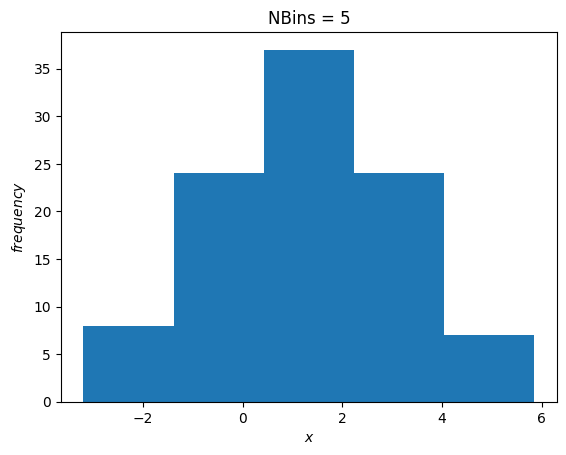

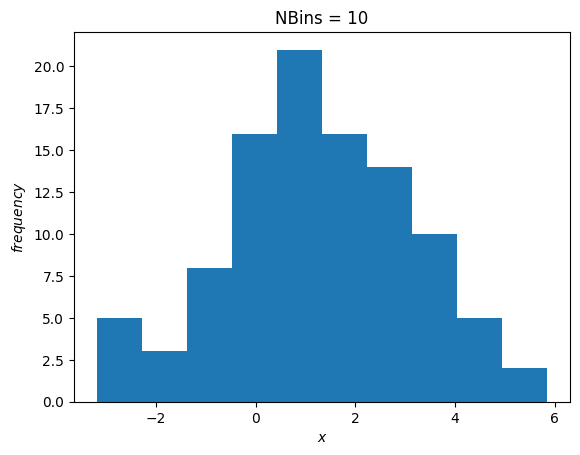

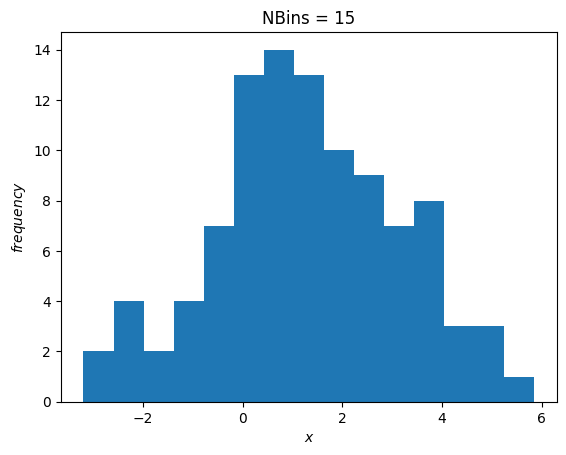

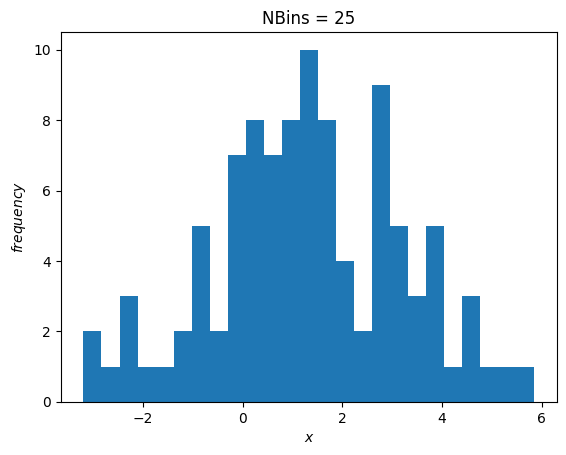

In [ ]:
#2
bins_list = [5, 10, 15, 25]

for bins_value in bins_list:
    plt.hist(sample, bins = bins_value)
    plt.title("NBins = %i" %bins_value)
    plt.ylabel('$frequency$')
    plt.xlabel('$x$');
    plt.show()

In [ ]:
#3

min_value = min(sample)
max_value = max(sample)
sample_span = max_value - min_value

bins_list = [5, 10, 15, 25]
for bins in bins_list:
    interval = sample_span / bins

    chi2_norm_value = 0
    chi2_uniform_value = 0
    chi2_chi2_value = 0

    for i in range(bins):
        a = min_value + i*interval
        b = min_value + (i + 1)*interval

        frequency = sample[(sample >= a) & (sample < b)].size
        if (i == (bins - 1)):
            frequency += 1

        probability_norm = sps.norm(loc = 1, scale = 2).cdf(b) - sps.norm(loc = 1, scale = 2).cdf(a)
        probability_uniform = sps.uniform(loc = min_value, scale = sample_span).cdf(b) - sps.uniform(loc = min_value, scale = sample_span).cdf(a)
        probability_chi2 = sps.chi2(df = 5).cdf(b) - sps.chi2(df = 5).cdf(a)

        chi2_norm_value += (((frequency - 100 * probability_norm)**2) / (100 * probability_norm))
        chi2_uniform_value += (((frequency - 100 * probability_uniform)**2) / (100 * probability_uniform))
        chi2_chi2_value += (((frequency - 100 * probability_chi2)**2) / (100 * probability_chi2))

    p_value_norm = 1 - sps.chi2(df = (bins - 0 - 1)).cdf(chi2_norm_value)
    p_value_uniform = 1 - sps.chi2(df = (bins - 2 - 1)).cdf(chi2_uniform_value)
    p_value_chi2 = 1 - sps.chi2(df = (bins - 0 - 1)).cdf(chi2_chi2_value)

    print("NBins: %i" %bins)
    print("\tchi2_norm: %.3f" %chi2_norm_value)
    print("\tp_value_norm: %.3f\n" %p_value_norm)

    print("\tchi2_uniform: %.3f" %chi2_uniform_value)
    print("\tp_value_uniform: %.3f\n" %p_value_uniform)

    print("\tchi2_chi2: %.3f" %chi2_chi2_value)
    print("\tp_value_chi2: %.3f" %p_value_chi2)

<ipython-input-34-65185b601112>:29: RuntimeWarning: divide by zero encountered in double_scalars
  chi2_chi2_value += (((frequency - 100 * probability_chi2)**2) / (100 * probability_chi2))


NBins: 5
	chi2_norm: 1.849
	p_value_norm: 0.764

	chi2_uniform: 31.700
	p_value_uniform: 0.000

	chi2_chi2: inf
	p_value_chi2: 0.000
NBins: 10
	chi2_norm: 5.665
	p_value_norm: 0.773

	chi2_uniform: 37.600
	p_value_uniform: 0.000

	chi2_chi2: inf
	p_value_chi2: 0.000
NBins: 15
	chi2_norm: 7.974
	p_value_norm: 0.891

	chi2_uniform: 40.400
	p_value_uniform: 0.000

	chi2_chi2: inf
	p_value_chi2: 0.000
NBins: 25
	chi2_norm: 21.287
	p_value_norm: 0.622

	chi2_uniform: 53.000
	p_value_uniform: 0.000

	chi2_chi2: inf
	p_value_chi2: 0.000


In [ ]:
#4
result_norm = sps.kstest(sample, sps.norm(loc = 1, scale = 2).cdf)
result_uniform = sps.kstest(sample, sps.uniform(loc = min(sample), scale = (max(sample) - min(sample))).cdf)
result_chi2 = sps.kstest(sample, sps.chi2(df = 5).cdf)

print("ks_norm: %.3f" %result_norm[0])
print("p_value_norm: %.3f\n" %result_norm[1])

print("ks_uniform: %.3f" %result_uniform[0])
print("p_value_uniform: %.3f\n" %result_uniform[1])

print("ks_chi2: %.3f" %result_chi2[0])
print("p_value_chi2: %.3f" %result_chi2[1])

ks_norm: 0.098
p_value_norm: 0.277

ks_uniform: 0.156
p_value_uniform: 0.013

ks_chi2: 0.527
p_value_chi2: 0.000


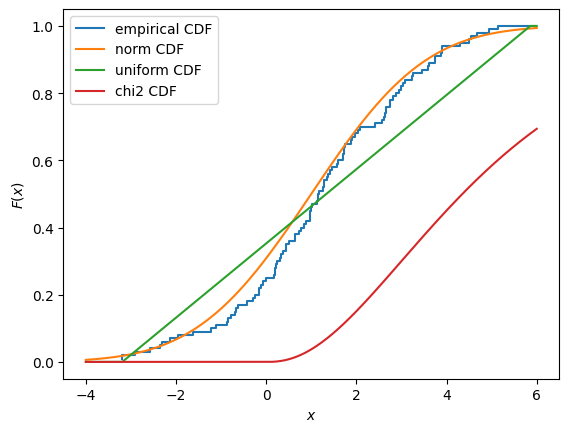

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label = "empirical CDF")

x = np.linspace(-4, 6, 5000)
cdf_norm = sps.norm(loc = 1, scale = 2).cdf(x)
cdf_uniform = sps.uniform(loc = min(sample), scale = (max(sample) - min(sample))).cdf(x)
cdf_chi2 = sps.chi2(df = 5).cdf(x)

plt.plot(x, cdf_norm, label = "norm CDF")
plt.plot(x, cdf_uniform, label = "uniform CDF")
plt.plot(x, cdf_chi2, label = "chi2 CDF")

plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(loc = "upper left")

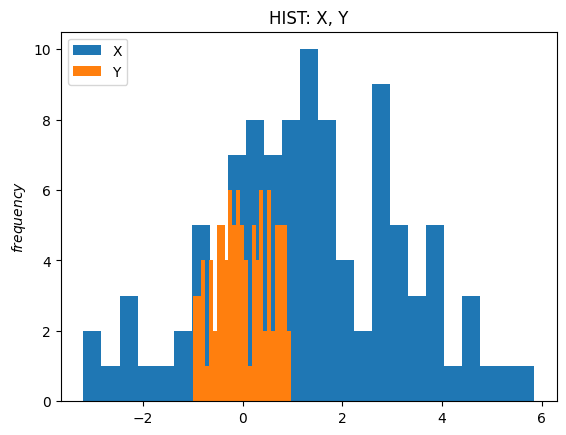

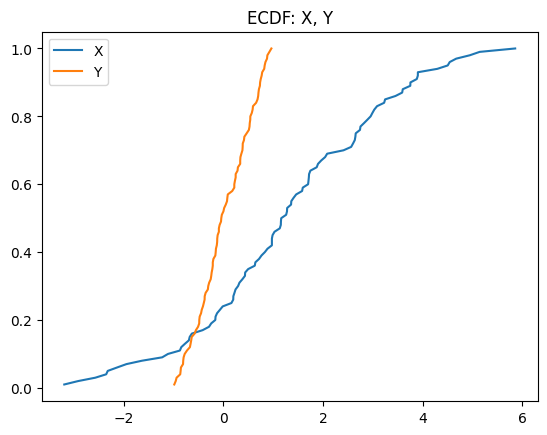

In [ ]:
#5
sample_x = sample
sample_y = sps.uniform(loc = -1, scale = 2).rvs(100)

plt.hist(sample_x, bins = 25, label = "X")
plt.hist(sample_y, bins = 25, label = "Y")

plt.ylabel('$frequency$')
plt.legend(loc = "upper left")
plt.title("HIST: X, Y")
plt.show()

ecdf_x = ECDF(sample_x)
ecdf_y = ECDF(sample_y)

plt.plot(ecdf_x.x, ecdf_x.y, label = "X")
plt.plot(ecdf_y.x, ecdf_y.y, label = "Y")

plt.legend(loc = "upper left")
plt.title("ECDF: X, Y")
plt.show()

In [ ]:
from statsmodels.stats.descriptivestats import sign_test as sign_test

In [ ]:
result_ks = sps.ks_2samp(sample_x, sample_y)
result_sign_test = sign_test([sample_x[i] - sample_y[i] for i in range(100)])
result_U_test = sps.ranksums(sample_x, sample_y)

min_value = min(min(sample_x), min(sample_y))
interval = (max(max(sample_x), max(sample_y)) - min_value) / 25

chi2_norm_value = 0
chi2_uniform_value = 0
chi2_chi2_value = 0

frequency_x = 0
frequency_y = 0
chi2 = 0
k = 0

for i in range(bins):
    a = min_value + i*interval
    b = min_value + (i + 1)*interval

    current_x = sample_x[(sample_x >= a) & (sample_x < b)].size
    current_y = sample_y[(sample_y >= a) & (sample_y < b)].size

    if ((current_x < 0.05) | (current_y < 0.05)):
        frequency_x += current_x
        frequency_y += current_y
    else:
        frequency_x = current_x
        frequency_y = current_y

        chi2 += (((frequency_x/100 - frequency_y/100)**2) * (1 / (frequency_x + frequency_y)))
        k += 1

chi2 *= 100 * 100
p_value_chi2 = 1 - sps.chi2(df = (k - 1)).cdf(chi2)

print("z_ks: %.3f" %result_ks[0])
print("p_value_ks: %.3f\n" %result_ks[1])
print("z_chi2: %.3f" %chi2)
print("p_value_chi2: %.3f\n" %p_value_chi2)
print("z_sign_test: %.3f" %result_sign_test[0])
print("p_value_sign_test: %.3f\n" %result_sign_test[1])
print("z_U_test: %.3f" %result_U_test[0])
print("p_value_U_test: %.3f" %result_U_test[1])

z_ks: 0.590
p_value_ks: 0.000

z_chi2: 35.753
p_value_chi2: 0.000

z_sign_test: 24.000
p_value_sign_test: 0.000

z_U_test: 6.140
p_value_U_test: 0.000
